In [2]:
import tensorflow as tf
import os
import pandas as pd
import zipfile
import shutil
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
#current_directory = os.getcwd()

# this variable should be changed after making .py files
current_directory = '/content/drive/MyDrive/Build a Deep CNN Image Classifier with ANY Images/\
GithubRepo/stopSignSegmentation'

raw_datas_path=os.path.join(current_directory, 'rawDatas')
print(raw_datas_path)

# Avoiding OOM
gpus= tf.config.experimental.list_physical_devices('GPU')
#gpus= tf.config.experimental.list_physical_devices('CPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
print(gpus)

/content/drive/MyDrive/Build a Deep CNN Image Classifier with ANY Images/GithubRepo/stopSignSegmentation/rawDatas
[]


In [4]:
gpus= tf.config.experimental.list_physical_devices('GPU')
image_exts=['jpeg','jpg','bmp','png']
classes_names_df=pd.read_csv(os.path.join(raw_datas_path,'labels.csv'))
# we only use two classes for this project
#classes_names_df=classes_names_df.iloc[[16,29]]
class_ids=classes_names_df.iloc[:,0].tolist()
classes_names=classes_names_df.iloc[:,1].tolist()
batch_size=16
datas=tf.keras.utils.image_dataset_from_directory(os.path.join(raw_datas_path,'traffic_Data','DATA'), batch_size=batch_size, image_size=(64,64))
datas=datas.map(lambda x,y:(x/255,y))
datas_iterator=datas.as_numpy_iterator()

Found 2384 files belonging to 58 classes.


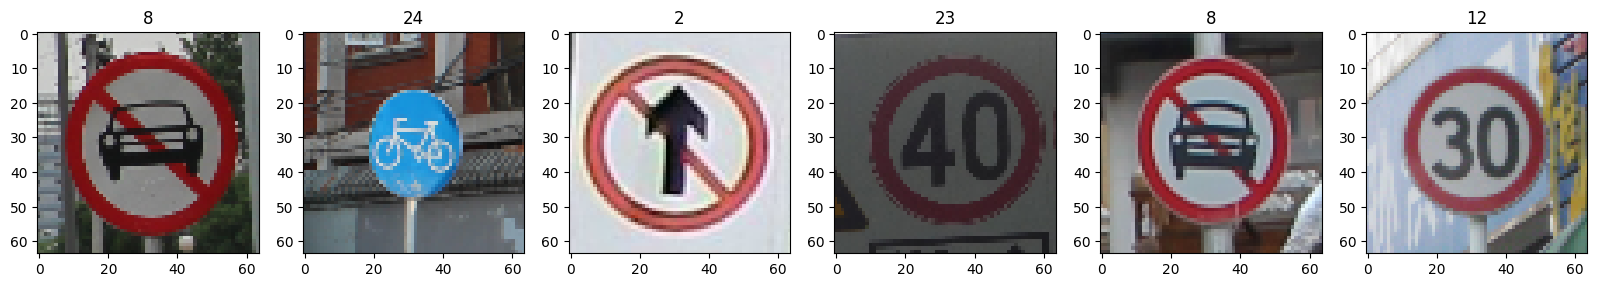

In [5]:
test_batch=datas_iterator.next()
fig, ax=plt.subplots(ncols=6, figsize=(20,20))
for idx, img in enumerate(test_batch[0][0:6]*255):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(test_batch[1][idx])

In [ ]:
# len(datas) returns number of batchs
train_size=int(0.7*len(datas))
test_size=int(0.1*len(datas))
validation_size=len(datas)-train_size-test_size

train_datas=datas.take(train_size)
test_datas=datas.skip(train_size).take(test_size)
validation_datas=datas.skip(train_size + test_size).take(validation_size)
